In [1]:
library(dplyr)
library(Seurat)
library(ggplot2)
library(data.table)
library(harmony)
# BiocManager::install("Rsamtools")
# devtools::install_github("rnabioco/djvdj")
library(djvdj)
library(scRepertoire)
library(SeuratDisk)
library(scRepertoire)

library(SeuratData)
library(destiny)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: Rcpp


Attaching package: ‘djvdj’


The following object is masked from ‘package:data.table’:

    :=


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [2]:
seu <- readRDS("../CompiledData/data/sarcoma_all/data_numbat_sarcoma_all_merged_obj_non_malignant.rds")


In [3]:
minFeature <- 300
minCount <- 600
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX', 'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 'SarcomaS914GEX', 'SarcomaS956GEX')


object.list <- lapply(pat_list, function (x) readRDS(paste0("~/CompiledData/data/", x, "/data_", 
                                        x, "_genes_", minFeature, '_UMI_', minCount, '_annotated_for_infercnv.rds')))
                      
                      
                      

In [4]:
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX', 'Sarcoma708GEX', 'SarcomaS914GEX')
tcr_list <- c('Sarcoma167TCR', 'Sarcoma322TCR', 'Sarcoma559TCR', 'Sarcoma708TCR', 'SarcomaS914TCR')
partial.list <- lapply(pat_list, function (x) readRDS(paste0('../CompiledData/data/', x, "/", x, "_cnv_non_malignant.rds")))
# partial.list <- lapply(pat_list, function (x) readRDS(paste0("data/", x, "/data_", x, "_genes_", minFeature, '_UMI_', minCount, '_annotated_for_infercnv.rds')))


In [5]:
# merge datasets without normalizing again
seu_merged <- merge(partial.list[[1]], y = partial.list[2:5], add.cell.ids = pat_list,
                    project = 'sarcoma_merged', merge.data = TRUE)
# seu_merged <- merge(object.list[[1]], y = object.list[2:8], add.cell.ids = pat_list,
#                     project = 'sarcoma_merged', merge.data = TRUE)

# Now for merged data
seu_merged <- NormalizeData(seu_merged, verbose = FALSE)
seu_merged <- FindVariableFeatures(seu_merged, verbose = FALSE)

# Normal workflow
seu_merged <- ScaleData(object = seu_merged)
seu_merged <- RunPCA(object = seu_merged)
seu_merged <- FindNeighbors(seu_merged, dims = 1:30)
seu_merged <- FindClusters(seu_merged)
seu_merged <- RunUMAP(object = seu_merged, dims = 1:30)

Centering and scaling data matrix

PC_ 1 
Positive:  NELL2, GLCCI1, ACSL1, SLC16A10, TNFAIP3, IFNG-AS1, LNCAROD, TFEC, KCNMA1, TENT5C 
	   TNIP3, CEP128, LINC02694, CCL4, IL7R, AC093895.1, AF165147.1, CLNK, MIR155HG, MRC1 
	   F13A1, CRTAM, LINC02446, AC016074.2, IL2RA, IKZF2, RTN1, PIM2, WDFY4, TFRC 
Negative:  NFIB, COL4A1, COL4A2, IGFBP7, MAGI1, CALD1, PTPRG, APBB2, FBXL7, DLC1 
	   MYO1B, LAMB1, LAMA4, ARHGAP29, WWTR1, RBFOX2, TJP1, HSPG2, ADAMTS9, RBPMS 
	   TIMP3, TEAD1, LAMC1, PREX2, TANC1, ADGRF5, MECOM, KIAA1217, ADGRL2, PBX1 
PC_ 2 
Positive:  COL4A1, FSTL1, SPARC, COL4A2, CD34, COL6A1, NID1, CFD, FBN1, MMP2 
	   CCDC80, PDE10A, COL6A2, FBLN2, FBLN1, CALD1, MAP1B, MFAP4, CAVIN1, PLVAP 
	   VWF, ADGRL4, PRRX1, SPRY1, AKAP12, FGFR1, IGFBP3, LAMA4, EGFL7, MCAM 
Negative:  SFTPB, ROS1, ZNF385B, SFTA3, ITGB6, ERBB4, SLC34A2, ADGRV1, LMO3, SLC22A3 
	   C4BPA, KCNJ15, AGBL1, ARHGEF38, CFAP221, C8orf34, COL4A3, SFTPD, TMC5, GRHL2 
	   SHANK2, NAPSA, SHROOM3, AC019117.1, ATP13A4, AC04

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 21781
Number of edges: 834108

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8966
Number of communities: 24
Elapsed time: 3 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:09:35 UMAP embedding parameters a = 0.9922 b = 1.112

20:09:35 Read 21781 rows and found 30 numeric columns

20:09:35 Using Annoy for neighbor search, n_neighbors = 30

20:09:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:09:39 Writing NN index file to temp file /tmp/RtmpeaSDfr/file63063bc0f32

20:09:39 Searching Annoy index using 1 thread, search_k = 3000

20:09:46 Annoy recall = 100%

20:09:47 Commencing smooth kNN distance calibration using 1 thread

20:09:49 Found 3 connecte

In [70]:
barcoder <- function(df, prefix){
#   df$barcode <- gsub(trim, "", df$barcode)
  df$barcode <- paste0(prefix, df$barcode)

  df
}
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX', 'Sarcoma708GEX', 'SarcomaS914GEX')
tcr_list <- c('Sarcoma167TCR', 'Sarcoma322TCR', 'Sarcoma559TCR', 'Sarcoma708TCR', 'SarcomaS914TCR')
# tcr_list <- c('SarcomaS914TCR')

basedir <- "~/CellRanger/"

clone.list <- lapply(X = seq_along(tcr_list), FUN = function (i) {
    clone <- read.csv(paste0(basedir, tcr_list[[i]], 'CellRanger/outs/filtered_contig_annotations.csv'))
    clone <- barcoder(clone, prefix=paste0(pat_list[[i]], '_'))
    clone
})


In [71]:
colnames(clone.list[[1]])

[1] "barcode"               "is_cell"               "contig_id"            
 [4] "high_confidence"       "length"                "chain"                
 [7] "v_gene"                "d_gene"                "j_gene"               
[10] "c_gene"                "full_length"           "productive"           
[13] "fwr1"                  "fwr1_nt"               "cdr1"                 
[16] "cdr1_nt"               "fwr2"                  "fwr2_nt"              
[19] "cdr2"                  "cdr2_nt"               "fwr3"                 
[22] "fwr3_nt"               "cdr3"                  "cdr3_nt"              
[25] "fwr4"                  "fwr4_nt"               "reads"                
[28] "umis"                  "raw_clonotype_id"      "raw_consensus_id"     
[31] "exact_subclonotype_id"

In [72]:
paste0(basedir, tcr_list[[1]], 'CellRanger/outs/filtered_contig_annotations.csv')

[1] "~/CellRanger/Sarcoma167TCRCellRanger/outs/filtered_contig_annotations.csv"

In [73]:
all_cln <- as.data.table(rbindlist(clone.list))

In [74]:
clone <- read.csv(paste0(basedir, tcr_list[[1]], 'CellRanger/outs/filtered_contig_annotations.csv'))
print(length(rownames(clone)))
clone <- barcoder(clone, prefix=paste0(pat_list[[1]], ''))
clone


[1] 50


barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,⋯,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
Sarcoma167GEXAAACCTGAGTCGTTTG-1,true,AAACCTGAGTCGTTTG-1_contig_1,true,483,TRB,TRBV12-4,,TRBJ1-5,TRBC1,⋯,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGCCTAATGCATCATTCTCCACTCTGAAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTC,CASSLAGGRGGQPQHF,TGTGCCAGCAGTTTAGCGGGGGGGCGAGGCGGTCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,542,11,clonotype2,clonotype2_consensus_1,2
Sarcoma167GEXAAAGCAATCACATACG-1,true,AAAGCAATCACATACG-1_contig_1,true,495,TRA,TRAV12-3,,TRAJ28,TRAC,⋯,AAAGAAGATGGAAGGTTTACAGCACAGGTCGATAAATCCAGCAAGTATATCTCCTTGTTCATCAGAGACTCACAGCCCAGTGATTCAGCCACCTACCTC,CAGGAGSYQLTF,TGTGCCGGTGGGGCTGGGAGTTACCAACTCACTTTC,GKGTKLSVIP,GGGAAGGGGACCAAACTCTCGGTCATACCAA,3732,1,clonotype21,clonotype21_consensus_2,1
Sarcoma167GEXAAAGCAATCACATACG-1,true,AAAGCAATCACATACG-1_contig_2,true,502,TRB,TRBV7-2,,TRBJ1-5,TRBC1,⋯,CCAGACAAATCAGGGCTGCCCAGTGATCGCTTCTCTGCAGAGAGGACTGGGGGATCCGTCTCCACTCTGACGATCCAGCGCACACAGCAGGAGGACTCGGCCGTGTATCTC,CASSFMGSGNEPQHF,TGTGCCAGCAGCTTCATGGGGAGCGGGAACGAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,11344,3,clonotype21,clonotype21_consensus_1,1
Sarcoma167GEXAACTCTTCAGACACTT-1,true,AACTCTTCAGACACTT-1_contig_1,true,544,TRB,TRBV7-3,,TRBJ2-1,TRBC2,⋯,GCAGATGACTCAGGGCTGCCCAACGATCGGTTCTTTGCAGTCAGGCCTGAGGGATCCGTCTCTACTCTGAAGATCCAGCGCACAGAGCGGGGGGACTCAGCCGTGTATCTC,CASSLILAGGYGTNNEQFF,TGTGCCAGCAGCTTAATTCTAGCGGGGGGTTACGGGACGAACAATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,5710,1,clonotype24,clonotype24_consensus_1,1
Sarcoma167GEXAACTCTTCAGACACTT-1,true,AACTCTTCAGACACTT-1_contig_2,true,457,TRA,TRAV2,,TRAJ24,TRAC,⋯,TCTCAGCAGGGACGATACAACATGACCTATGAACGGTTCTCTTCATCGCTGCTCATCCTCCAGGTGCGGGAGGCAGATGCTGCTGTTTACTAC,CAVEDPTDSWGKLQF,TGTGCTGTGGAGGATCCCACTGACAGCTGGGGGAAATTGCAGTTT,GAGTQVVVTP,GGAGCAGGGACCCAGGTTGTGGTCACCCCAG,8090,2,clonotype24,clonotype24_consensus_2,1
Sarcoma167GEXACACCCTGTCAGCTAT-1,true,ACACCCTGTCAGCTAT-1_contig_1,true,512,TRB,TRBV20-1,,TRBJ1-1,TRBC1,⋯,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATGCAAGCCTGACCTTGTCCACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATC,CSAGLGTEAFF,TGCAGTGCCGGGTTGGGCACTGAAGCTTTCTTT,GQGTRLTVV,GGACAAGGCACCAGACTCACAGTTGTAG,9542,3,clonotype1,clonotype1_consensus_1,1
Sarcoma167GEXACACCCTGTCAGCTAT-1,true,ACACCCTGTCAGCTAT-1_contig_2,true,505,TRA,TRAV17,,TRAJ26,TRAC,⋯,AAACACAGTGGAAGATTAAGAGTCACGCTTGACACTTCCAAGAAAAGCAGTTCCTTGTTGATCACGGCTTCCCGGGCAGCAGACACTGCTTCTTACTTC,CATDDYGQNFVF,TGTGCTACGGACGACTATGGTCAGAATTTTGTCTTT,GPGTRLSVLP,GGTCCCGGAACCAGATTGTCCGTGCTGCCCT,6162,1,clonotype1,clonotype1_consensus_2,1
Sarcoma167GEXACTGAGTCAGACGCCT-1,true,ACTGAGTCAGACGCCT-1_contig_1,true,544,TRA,TRAV12-2,,TRAJ5,TRAC,⋯,AAAGAAGATGGAAGGTTTACAGCACAGCTCAATAAAGCCAGCCAGTATGTTTCTCTGCTCATCAGAGACTCCCAGCCCAGTGATTCAGCCACCTACCTC,CAAPKSGRRALTF,TGTGCCGCGCCTAAGTCGGGCAGGAGAGCACTTACTTTT,GSGTRLQVQP,GGGAGTGGAACAAGACTCCAAGTGCAACCAA,6408,2,clonotype20,clonotype20_consensus_2,1
Sarcoma167GEXACTGAGTCAGACGCCT-1,true,ACTGAGTCAGACGCCT-1_contig_2,true,536,TRB,TRBV18,,TRBJ2-7,TRBC2,⋯,ATAGATGAGTCAGGAATGCCAAAGGAACGATTTTCTGCTGAATTTCCCAAAGAGGGCCCCAGCATCCTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTC,CASSPFRDSSYEQYF,TGTGCCAGCTCACCATTCCGGGACAGCTCCTACGAGCAGTACTTC,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,3932,1,clonotype20,clonotype20_consensus_1,1


In [75]:
library(dplyr)
string_columns <- clone %>%
                   select_if(is.character) %>%
                   names()

string_columns

[1] "barcode"          "is_cell"          "contig_id"        "high_confidence" 
 [5] "chain"            "v_gene"           "d_gene"           "j_gene"          
 [9] "c_gene"           "full_length"      "productive"       "fwr1"            
[13] "fwr1_nt"          "cdr1"             "cdr1_nt"          "fwr2"            
[17] "fwr2_nt"          "cdr2"             "cdr2_nt"          "fwr3"            
[21] "fwr3_nt"          "cdr3"             "cdr3_nt"          "fwr4"            
[25] "fwr4_nt"          "raw_clonotype_id" "raw_consensus_id"

In [76]:
for (x in clone.list){
    print(dim(x['raw_clonotype_id']))
}

[1] 50  1
[1] 1131    1
[1] 199   1
[1] 174   1
[1] 371   1


In [78]:
50+1131+199+174+371

[1] 1925

In [12]:
data_concater <- function(x){

  x<- levels(factor(x))

  paste(x, collapse = "__")

}
grpn = uniqueN(all_cln$barcode)
pb <- txtProgressBar(min = 0, max = grpn, style = 3)
# This code applies data_concater function per  barcodes to create a 
# concatenated string with  the information we want to keep

all_cln_collapsed <- all_cln[, {setTxtProgressBar(pb,.GRP); lapply(.SD, data_concater)} , by=barcode]

# Or you can use the simple code below if you don't care about the progress bar
# all_cln_collapsed <- all_cln[, lapply(.SD, data_concater), by=barcode]

# Assign row names for merging into combined Seurat object

rownames(all_cln_collapsed) <- all_cln_collapsed$barcode


  |======================================================================| 100%

In [13]:
seu_tcr <- AddMetaData(seu_merged, metadata = all_cln_collapsed)
# seu_tcr <- AddMetaData(object.list[[1]], metadata = all_cln_collapsed)

In [14]:
Tcell_S914 <- subset(seu_tcr, subset = (patient == 'SarcomaS914GEX') & (is_cell == 'true'))
length(Cells(Tcell_S914))


[1] 217

In [15]:
# Import VDJ data
# A vector of paths can be provided to load multiple datasets
# If prefixes were added to the cell barcodes when the object was generated,
# include these as the vector names
paths.list <- lapply(X = seq_along(tcr_list), FUN = function (i) {
    path <- paste0(basedir, tcr_list[[i]])
    path
})

paths.list <- c(
  Sarcoma167GEX = paste0(basedir, tcr_list[[1]], "CellRanger/outs"),
  Sarcoma322GEX = paste0(basedir, tcr_list[[2]], "CellRanger/outs"),
  Sarcoma559GEX = paste0(basedir, tcr_list[[3]], "CellRanger/outs"),
  Sarcoma708GEX = paste0(basedir, tcr_list[[4]], "CellRanger/outs"),
  SarcomaS914GEX = paste0(basedir, tcr_list[[5]], "CellRanger/outs")
)

so_tcr <- import_vdj(
  input         = seu_merged,                     # Seurat object
  vdj_dir       = paths.list,                      # Cellranger output directories
  filter_paired = FALSE                       # Only include clonotypes with paired chains
)


In [16]:
total_cells = 0
clone.list <- lapply(X = seq_along(tcr_list), FUN = function (i) {

    filtered.contig <- read.csv(paste0(basedir, tcr_list[[i]], 'CellRanger/outs/filtered_contig_annotations.csv'))
    contig.list <- createHTOContigList(contig = filtered.contig, sc = partial.list[[i]], group.by = "patient")
    contig.list <- do.call(rbind.data.frame, contig.list)
#     contig.list <- barcoder(as.data.frame(contig.list), prefix=paste0(pat_list[[i]], '_'))
    contig.list
})

for(i in 1:length(clone.list)) {
    print(length(clone.list[[i]]$barcode))
    total_cells = total_cells + length(clone.list[[i]]$barcode)
}
print("total TCR matched cells:", str(total_cells))

[1] 40
[1] 854
[1] 190
[1] 146
[1] 347
 num 1577
[1] "total TCR matched cells:"


In [51]:
clone

[1] 1577

In [17]:
combined <- combineTCR(clone.list, 
                samples = pat_list, 
                cells ="T-AB", filterMulti = FALSE)

In [18]:
combined

,barcode,sample,TCR1,cdr3_aa1,cdr3_nt1,TCR2,cdr3_aa2,cdr3_nt2,CTgene,CTnt,CTaa,CTstrict,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Sarcoma167GEX_AAAGCAATCACATACG-1,Sarcoma167GEX,TRAV12-3.TRAJ28.TRAC,CAGGAGSYQLTF,TGTGCCGGTGGGGCTGGGAGTTACCAACTCACTTTC,TRBV7-2.NA.TRBJ1-5.TRBC1,CASSFMGSGNEPQHF,TGTGCCAGCAGCTTCATGGGGAGCGGGAACGAGCCCCAGCATTTT,TRAV12-3.TRAJ28.TRAC_TRBV7-2.NA.TRBJ1-5.TRBC1,TGTGCCGGTGGGGCTGGGAGTTACCAACTCACTTTC_TGTGCCAGCAGCTTCATGGGGAGCGGGAACGAGCCCCAGCATTTT,CAGGAGSYQLTF_CASSFMGSGNEPQHF,TRAV12-3.TRAJ28.TRAC_TGTGCCGGTGGGGCTGGGAGTTACCAACTCACTTTC_TRBV7-2.NA.TRBJ1-5.TRBC1_TGTGCCAGCAGCTTCATGGGGAGCGGGAACGAGCCCCAGCATTTT,T-AB
3,Sarcoma167GEX_AACTCTTCAGACACTT-1,Sarcoma167GEX,TRAV2.TRAJ24.TRAC,CAVEDPTDSWGKLQF,TGTGCTGTGGAGGATCCCACTGACAGCTGGGGGAAATTGCAGTTT,TRBV7-3.NA.TRBJ2-1.TRBC2,CASSLILAGGYGTNNEQFF,TGTGCCAGCAGCTTAATTCTAGCGGGGGGTTACGGGACGAACAATGAGCAGTTCTTC,TRAV2.TRAJ24.TRAC_TRBV7-3.NA.TRBJ2-1.TRBC2,TGTGCTGTGGAGGATCCCACTGACAGCTGGGGGAAATTGCAGTTT_TGTGCCAGCAGCTTAATTCTAGCGGGGGGTTACGGGACGAACAATGAGCAGTTCTTC,CAVEDPTDSWGKLQF_CASSLILAGGYGTNNEQFF,TRAV2.TRAJ24.TRAC_TGTGCTGTGGAGGATCCCACTGACAGCTGGGGGAAATTGCAGTTT_TRBV7-3.NA.TRBJ2-1.TRBC2_TGTGCCAGCAGCTTAATTCTAGCGGGGGGTTACGGGACGAACAATGAGCAGTTCTTC,T-AB
5,Sarcoma167GEX_ACTGAGTCAGACGCCT-1,Sarcoma167GEX,TRAV12-2.TRAJ5.TRAC,CAAPKSGRRALTF,TGTGCCGCGCCTAAGTCGGGCAGGAGAGCACTTACTTTT,TRBV18.NA.TRBJ2-7.TRBC2,CASSPFRDSSYEQYF,TGTGCCAGCTCACCATTCCGGGACAGCTCCTACGAGCAGTACTTC,TRAV12-2.TRAJ5.TRAC_TRBV18.NA.TRBJ2-7.TRBC2,TGTGCCGCGCCTAAGTCGGGCAGGAGAGCACTTACTTTT_TGTGCCAGCTCACCATTCCGGGACAGCTCCTACGAGCAGTACTTC,CAAPKSGRRALTF_CASSPFRDSSYEQYF,TRAV12-2.TRAJ5.TRAC_TGTGCCGCGCCTAAGTCGGGCAGGAGAGCACTTACTTTT_TRBV18.NA.TRBJ2-7.TRBC2_TGTGCCAGCTCACCATTCCGGGACAGCTCCTACGAGCAGTACTTC,T-AB
7,Sarcoma167GEX_AGAATAGGTGACAAAT-1,Sarcoma167GEX,NA,NA,NA,TRBV20-1.NA.TRBJ1-1.TRBC1,CSAGLGTEAFF,TGCAGTGCCGGGTTGGGCACTGAAGCTTTCTTT,NA_TRBV20-1.NA.TRBJ1-1.TRBC1,NA_TGCAGTGCCGGGTTGGGCACTGAAGCTTTCTTT,NA_CSAGLGTEAFF,NA_NA_TRBV20-1.NA.TRBJ1-1.TRBC1_TGCAGTGCCGGGTTGGGCACTGAAGCTTTCTTT,T-AB
8,Sarcoma167GEX_AGTGGGACATCTCGCT-1,Sarcoma167GEX,NA,NA,NA,TRBV10-2.NA.TRBJ1-2.TRBC1,CASSADSIYGYTF,TGCGCCAGCAGTGCGGACAGCATCTATGGCTACACCTTC,NA_TRBV10-2.NA.TRBJ1-2.TRBC1,NA_TGCGCCAGCAGTGCGGACAGCATCTATGGCTACACCTTC,NA_CASSADSIYGYTF,NA_NA_TRBV10-2.NA.TRBJ1-2.TRBC1_TGCGCCAGCAGTGCGGACAGCATCTATGGCTACACCTTC,T-AB
9,Sarcoma167GEX_ATAACGCGTCTGGAGA-1,Sarcoma167GEX,NA,NA,NA,TRBV6-5.TRBD2.TRBJ2-3.TRBC2,CASSYTEPREGTSGGDTDTQYF,TGTGCCAGCAGTTACACCGAACCCAGGGAAGGGACTAGCGGGGGTGACACAGATACGCAGTATTTT,NA_TRBV6-5.TRBD2.TRBJ2-3.TRBC2,NA_TGTGCCAGCAGTTACACCGAACCCAGGGAAGGGACTAGCGGGGGTGACACAGATACGCAGTATTTT,NA_CASSYTEPREGTSGGDTDTQYF,NA_NA_TRBV6-5.TRBD2.TRBJ2-3.TRBC2_TGTGCCAGCAGTTACACCGAACCCAGGGAAGGGACTAGCGGGGGTGACACAGATACGCAGTATTTT,T-AB
10,Sarcoma167GEX_ATCATCTGTGATGTCT-1,Sarcoma167GEX,NA,NA,NA,TRBV12-3.TRBD2.TRBJ2-7.TRBC2,CASSMTSGRGEQYF,TGTGCCAGCAGTATGACTAGCGGGAGGGGAGAGCAGTACTTC,NA_TRBV12-3.TRBD2.TRBJ2-7.TRBC2,NA_TGTGCCAGCAGTATGACTAGCGGGAGGGGAGAGCAGTACTTC,NA_CASSMTSGRGEQYF,NA_NA_TRBV12-3.TRBD2.TRBJ2-7.TRBC2_TGTGCCAGCAGTATGACTAGCGGGAGGGGAGAGCAGTACTTC,T-AB
11,Sarcoma167GEX_ATCTACTTCTTGCATT-1,Sarcoma167GEX,TRAV26-1.TRAJ53.TRAC,CIVRSLNSGGSNYKLTF,TGCATCGTCAGGTCCTTGAATAGTGGAGGTAGCAACTATAAACTGACATTT,TRBV7-9.NA.TRBJ1-5.TRBC1,CASSAVGSSNQPQHF,TGTGCCAGCAGCGCCGTTGGTAGTAGCAATCAGCCCCAGCATTTT,TRAV26-1.TRAJ53.TRAC_TRBV7-9.NA.TRBJ1-5.TRBC1,TGCATCGTCAGGTCCTTGAATAGTGGAGGTAGCAACTATAAACTGACATTT_TGTGCCAGCAGCGCCGTTGGTAGTAGCAATCAGCCCCAGCATTTT,CIVRSLNSGGSNYKLTF_CASSAVGSSNQPQHF,TRAV26-1.TRAJ53.TRAC_TGCATCGTCAGGTCCTTGAATAGTGGAGGTAGCAACTATAAACTGACATTT_TRBV7-9.NA.TRBJ1-5.TRBC1_TGTGCCAGCAGCGCCGTTGGTAGTAGCAATCAGCCCCAGCATTTT,T-AB
13,Sarcoma167GEX_ATTATCCCAGTTAACC-1,Sarcoma167GEX,TRAV17.TRAJ26.TRAC,CATDDYGQNFVF,TGTGCTACGGACGACTATGGTCAGAATTTTGTCTTT,NA,NA,NA,TRAV17.TRAJ26.TRAC_NA,TGTGCTACGGACGACTATGGTCAGAATTTTGTCTTT_NA,CATDDYGQNFVF_NA,TRAV17.TRAJ26.TRAC_TGTGCTACGGACGACTATGGTCAGAATTTTGTCTTT_NA_NA,T-AB


In [36]:
quantContig_output <- quantContig(combined, cloneCall="gene+nt", scale = F, chain = "both", exportTable = T)
sum(quantContig_output$contigs
)


[1] 781

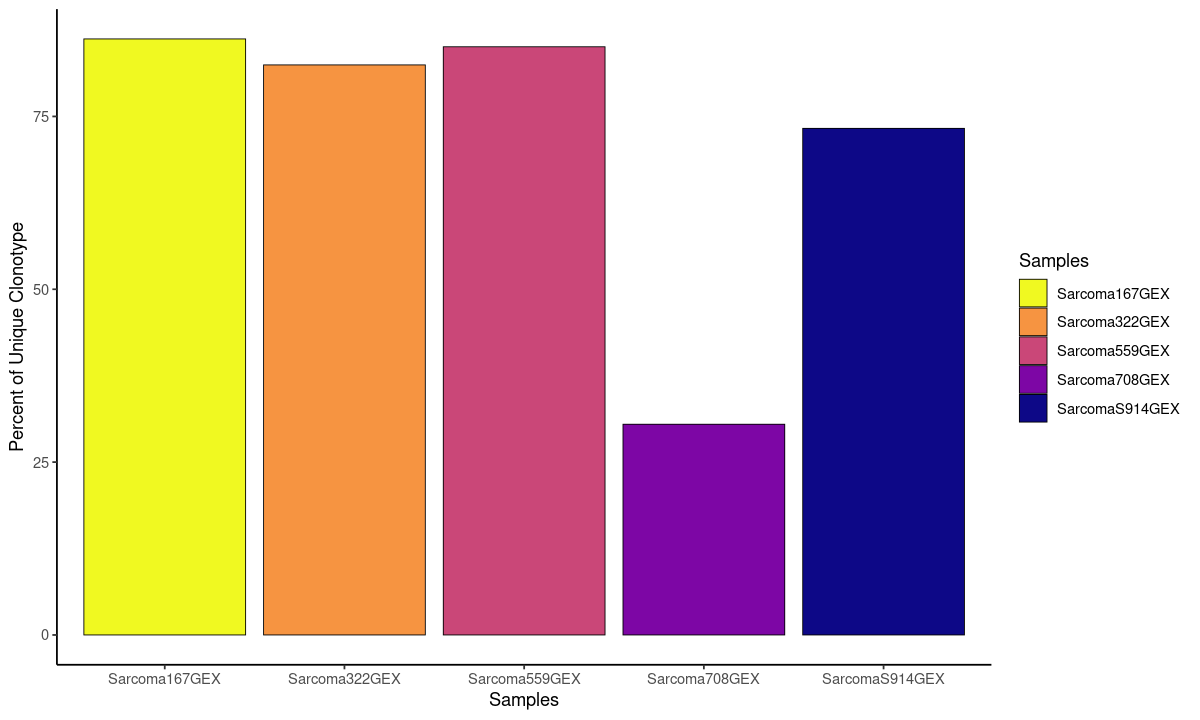

contigs,values,total
<int>,<chr>,<int>
25,Sarcoma167GEX,29
451,Sarcoma322GEX,547
114,Sarcoma559GEX,134
32,Sarcoma708GEX,105
159,SarcomaS914GEX,217


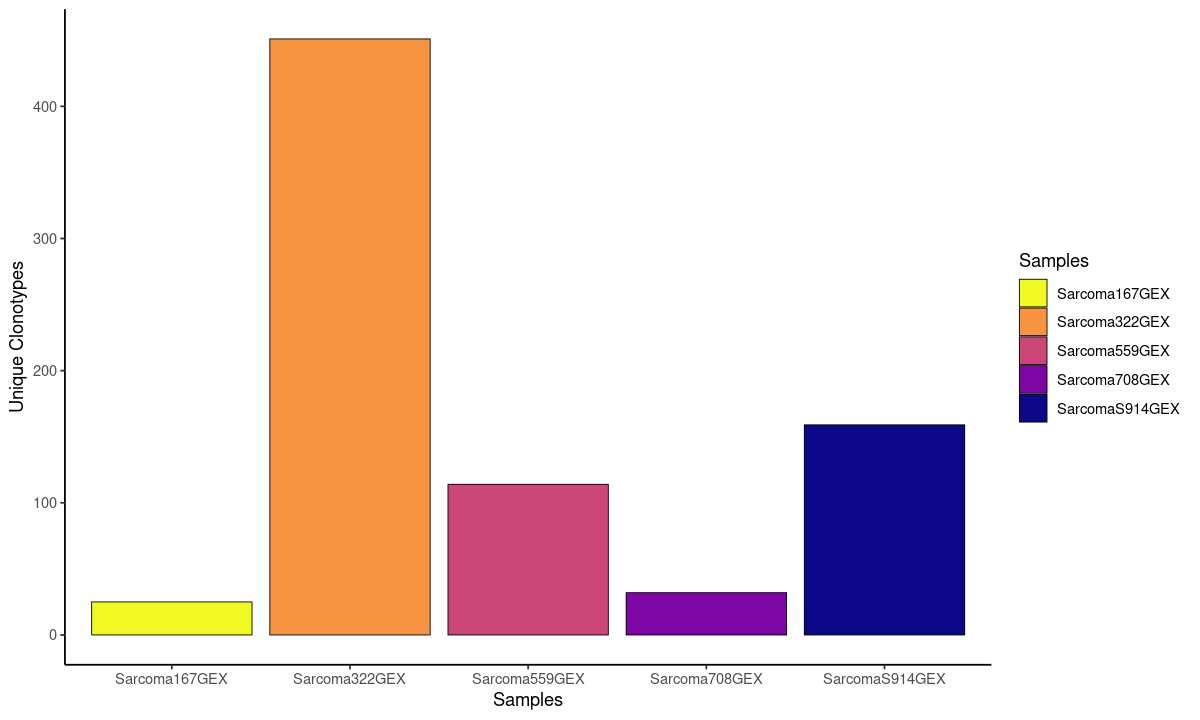

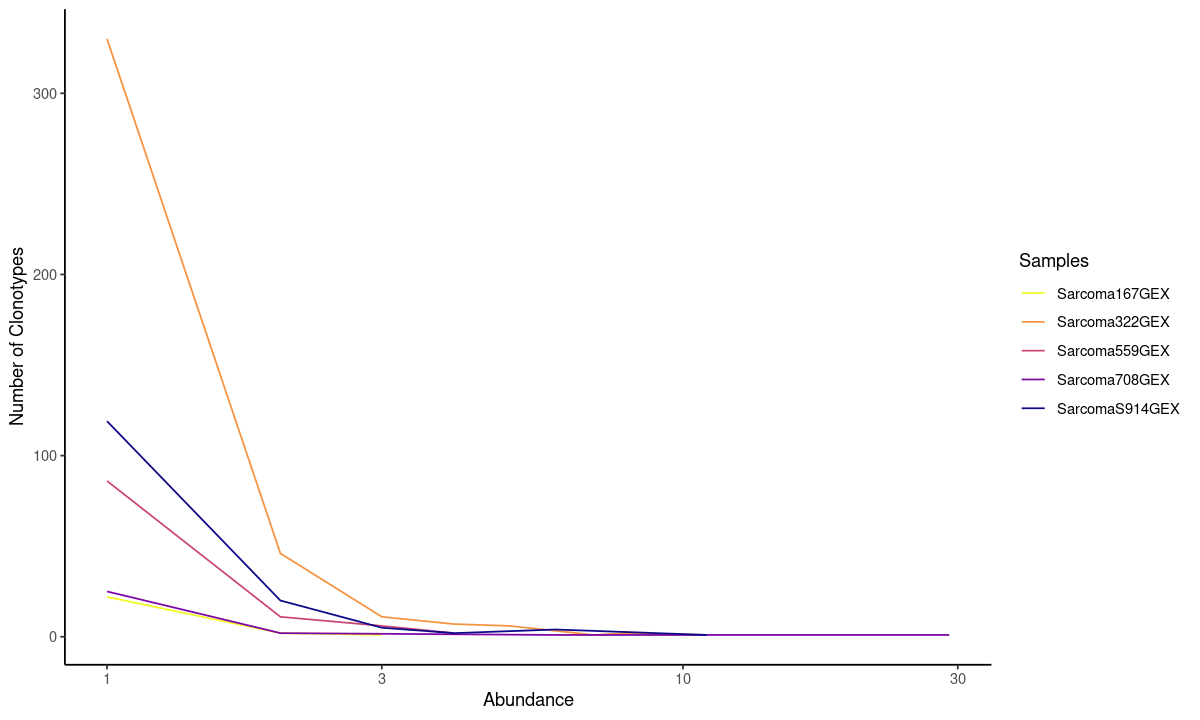

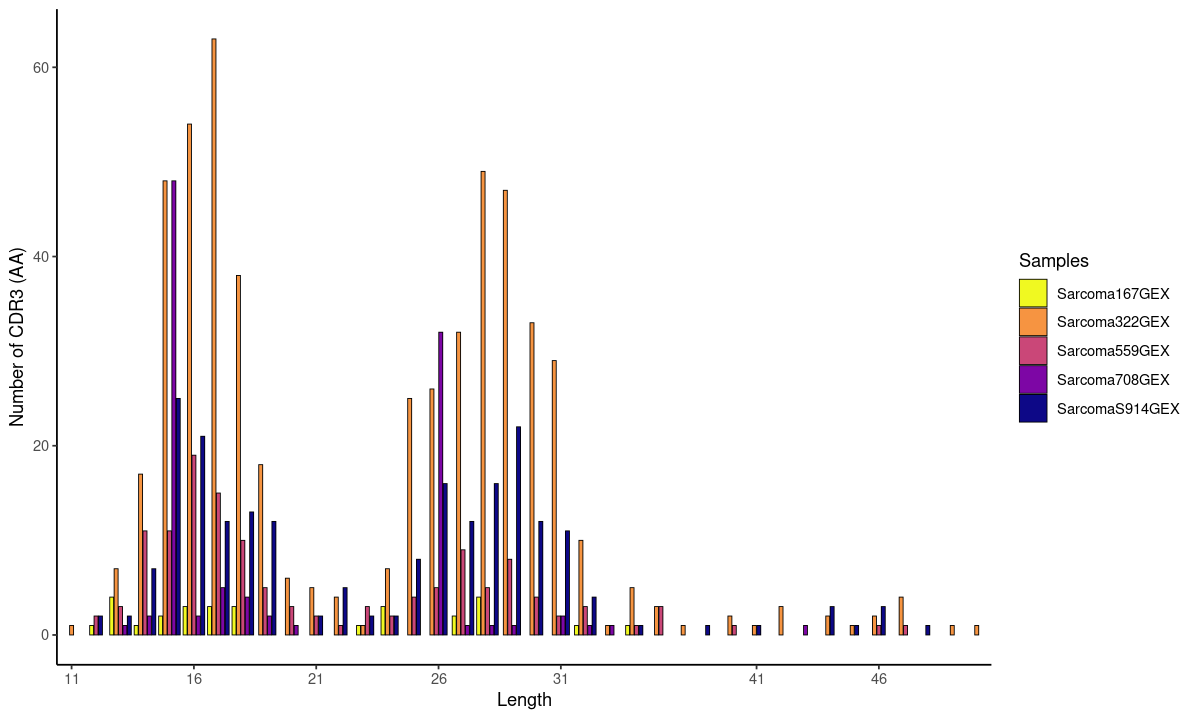

Warning message:
“Removed 10 rows containing missing values (`geom_text()`).”


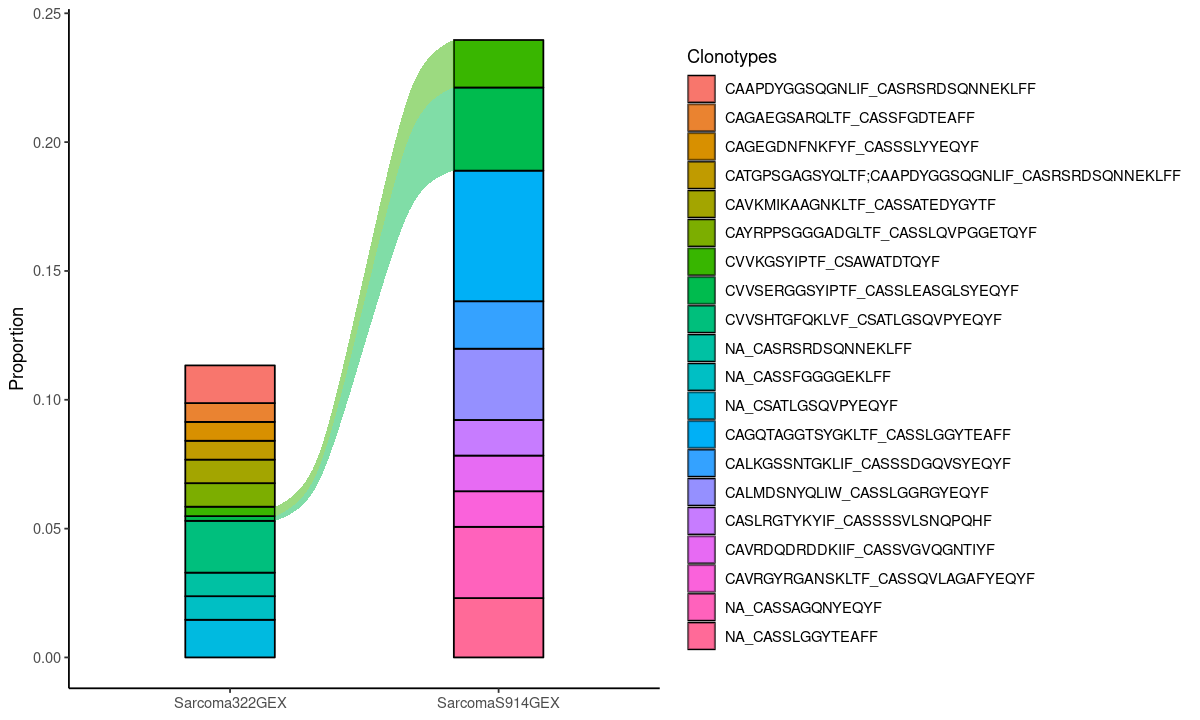

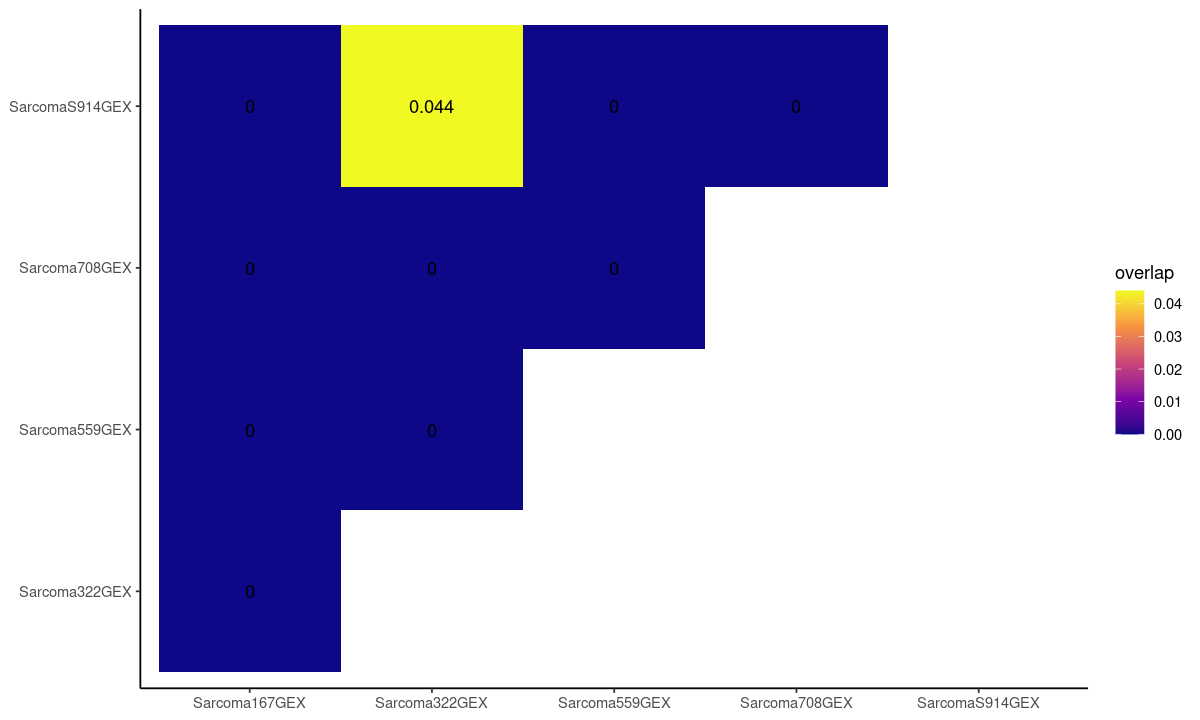

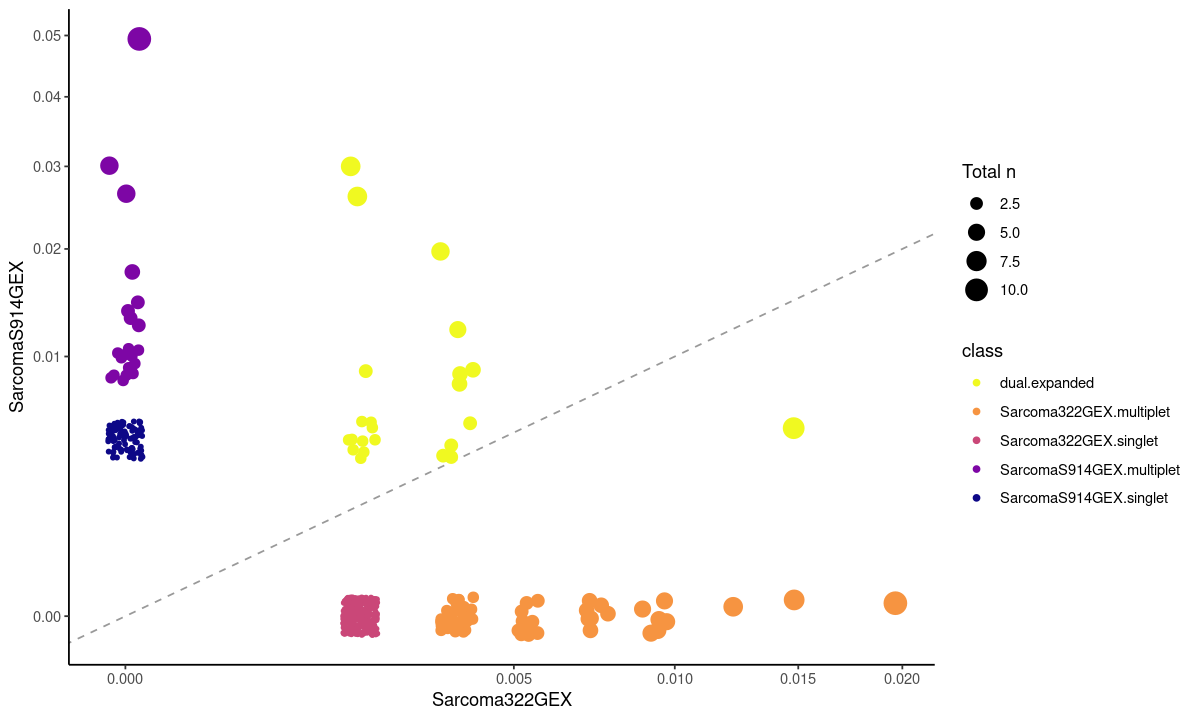

In [19]:
options(repr.plot.width=10, repr.plot.height=6)
quantContig(combined, cloneCall="gene+nt", scale = T)

quantContig(combined, cloneCall="gene+nt", scale = F, chain = "both")
quantContig_output <- quantContig(combined, cloneCall="gene+nt", scale = F, chain = "both", exportTable = T)
quantContig_output

abundanceContig(combined, cloneCall = "gene", scale = F)

lengthContig(combined, cloneCall="aa", chain = "both") 

compareClonotypes(combined, numbers = 10, samples = c("Sarcoma322GEX", "SarcomaS914GEX"), 
                    cloneCall="aa", graph = "alluvial")

clonalOverlap(combined, cloneCall = "gene+nt", 
              method = "overlap")

scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "Sarcoma322GEX",
                 y.axis = "SarcomaS914GEX",
                 dot.size = "total",
                 graph = "proportion")

In [20]:
seu <- FindClusters(
  seu,
  resolution = 0.2)

#Cell Type Groups
myeloids <- c(0, 5, 10, 13)
tcells <- c(1, 4, 7, 8)
bcells <- c(3, 9, 11)
stroma <- c(12, 6, 2)

broad_assignments <- c("Myeloid", "T-cell", "Stroma" ,"B-cell", "T-cell", "Myeloid" ,"Stroma" ,
           "T-cell", "T-cell",
           "B-cell", "Myeloid", "B-cell", "Stroma", "Myeloid")

broad_assignments_v2 <- c("Myeloid", "T-cell", "Fibroblast" ,"B-cell/Plasma cell", "T-cell", "Myeloid" ,"Endothelial cell" ,
           "T-cell", "T-cell",
           "B-cell/Plasma cell", "Myeloid", "B-cell/Plasma cell", "Myofibroblast", "Myeloid")

specific_assignments <- c("macrophage",
                          "T-cell",
"fibroblast",
"B-cell/Plasma cell",
"T-cell",
"monocyte",
"endothelial cells",
"T-reg",
"proliferating T-cell",
"B-cell/Plasma cell",
"proliferating monoctye",
"B-cell/Plasma cell",
"myofibroblast",
"mast cell")
Idents(object = seu) <- "integrated_snn_res.0.2"




nm <- setNames(broad_assignments_v2, levels(Idents(seu)))
seu <- RenameIdents(seu, nm)
seu[["BI_broad_assignments_v2"]] <- Idents(object = seu) 
Idents(object = seu) <- "integrated_snn_res.0.2"


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 29046
Number of edges: 1206370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9482
Number of communities: 14
Elapsed time: 6 seconds


In [21]:
# Add the items from orig.ident to each item in the original_list
result_list <- paste(seu@meta.data$orig.ident, rownames(seu@meta.data), sep = "_")
result_list <- gsub("_[^_]*$", "", result_list)
rownames(seu@meta.data) <- result_list



In [22]:
seu@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,patient,celltype_initial_singleR,predicted_doublets,⋯,compartment_opt,p_6,p_7,p_x_6,p_x_7,p_y_6,p_y_7,integrated_snn_res.0.8,integrated_snn_res.0.2,BI_broad_assignments_v2
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Sarcoma167GEX_TGCCCTATCGGATGGA-1,Sarcoma167GEX,30615,6437,1.5841908,0.15351952,0.146986771,0.30050629,Sarcoma167GEX,Endothelial cells,FALSE,⋯,normal,NA,NA,NA,NA,NA,NA,9,6,Endothelial cell
Sarcoma167GEX_TACGGATTCAGCTTAG-1,Sarcoma167GEX,28514,6765,0.5155362,0.12625377,0.112225573,0.23847934,Sarcoma167GEX,Endothelial cells,FALSE,⋯,normal,NA,NA,NA,NA,NA,NA,9,6,Endothelial cell
Sarcoma167GEX_AGTGGGAGTCTTCTCG-1,Sarcoma167GEX,22749,6049,1.8066728,0.41760077,0.461558750,0.87915952,Sarcoma167GEX,Endothelial cells,FALSE,⋯,normal,NA,NA,NA,NA,NA,NA,9,6,Endothelial cell
Sarcoma167GEX_TACACGATCGTGGGAA-1,Sarcoma167GEX,21513,5672,1.2132199,0.20452750,0.144098917,0.34862641,Sarcoma167GEX,Endothelial cells,FALSE,⋯,normal,NA,NA,NA,NA,NA,NA,9,6,Endothelial cell
Sarcoma167GEX_CGATGGCGTGTGCCTG-1,Sarcoma167GEX,20163,5443,3.0055051,0.27277687,0.123989486,0.39676635,Sarcoma167GEX,Endothelial cells,FALSE,⋯,normal,NA,NA,NA,NA,NA,NA,9,6,Endothelial cell
Sarcoma167GEX_CGTTAGAGTGGTCTCG-1,Sarcoma167GEX,18676,5055,0.9959306,0.17134290,0.069608053,0.24095095,Sarcoma167GEX,Endothelial cells,FALSE,⋯,normal,NA,NA,NA,NA,NA,NA,9,6,Endothelial cell
Sarcoma167GEX_TACAGTGTCAAGCCTA-1,Sarcoma167GEX,17502,5167,3.2796252,0.23997257,0.131413553,0.37138613,Sarcoma167GEX,Endothelial cells,FALSE,⋯,normal,NA,NA,NA,NA,NA,NA,9,6,Endothelial cell
Sarcoma167GEX_ACACCCTTCACAAACC-1,Sarcoma167GEX,17431,5361,5.2722162,0.20079169,0.166370260,0.36716195,Sarcoma167GEX,Endothelial cells,FALSE,⋯,normal,NA,NA,NA,NA,NA,NA,9,6,Endothelial cell
Sarcoma167GEX_GCTGGGTTCTGTTTGT-1,Sarcoma167GEX,17344,5421,1.0032288,0.14990775,0.098016605,0.24792435,Sarcoma167GEX,Endothelial cells,FALSE,⋯,normal,NA,NA,NA,NA,NA,NA,9,6,Endothelial cell


In [23]:
common_cells <- intersect(rownames(seu_merged@meta.data), rownames(seu@meta.data))

seu_merged <- subset_seu_merged <- subset(seu_merged, cells = common_cells)


In [24]:
common_cells <- intersect(rownames(seu_merged@meta.data), rownames(seu@meta.data))


# Assign the values from seu to seu_merged
seu_merged@meta.data$cell_type <- NULL  # Make sure to remove the column if it already exists
seu_merged@meta.data$cell_type <- NA  # Initialize the new column with NA
seu_merged@meta.data$cell_type<- seu@meta.data[rownames(seu@meta.data) %in% common_cells,]$BI_broad_assignments_v2

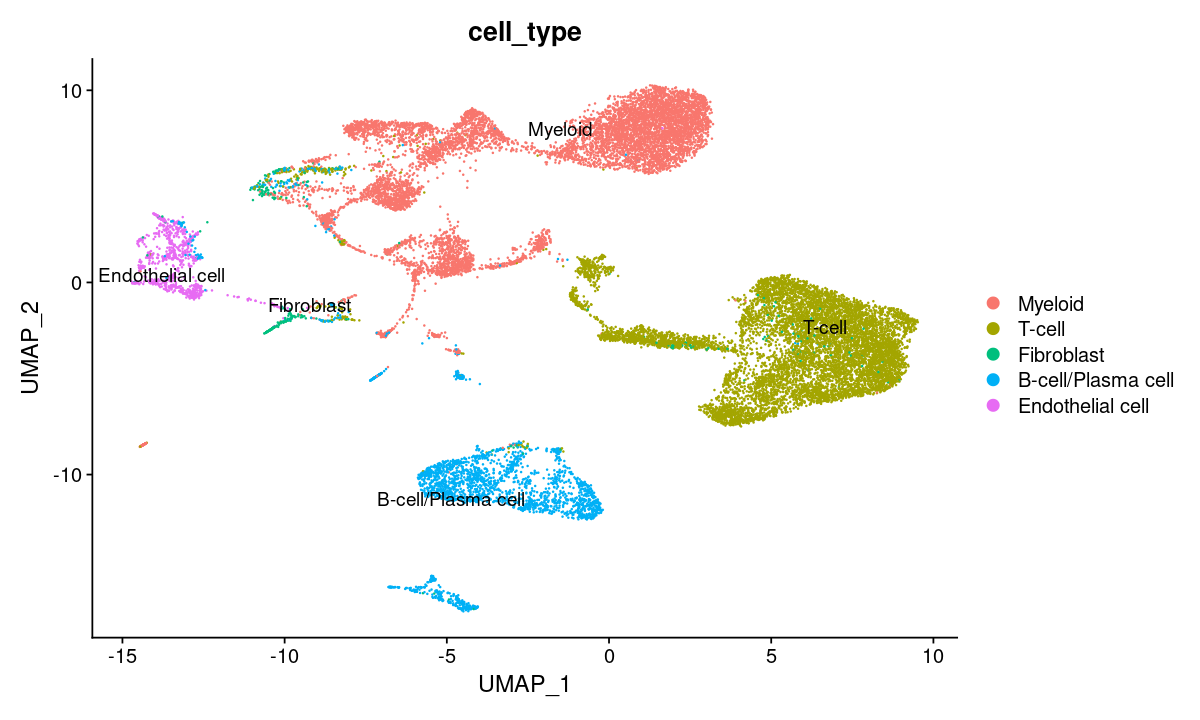

In [25]:
DimPlot(object = seu_merged, 
reduction = 'umap',group.by="cell_type", label = TRUE, repel = TRUE)


[1] 9071


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
   2 2232 1824 1313 1167    5    3   24  930  916    2    1    3  145    4  418 
  16   18   19   20   23 
  56    3   18    4    1 

[1] 981

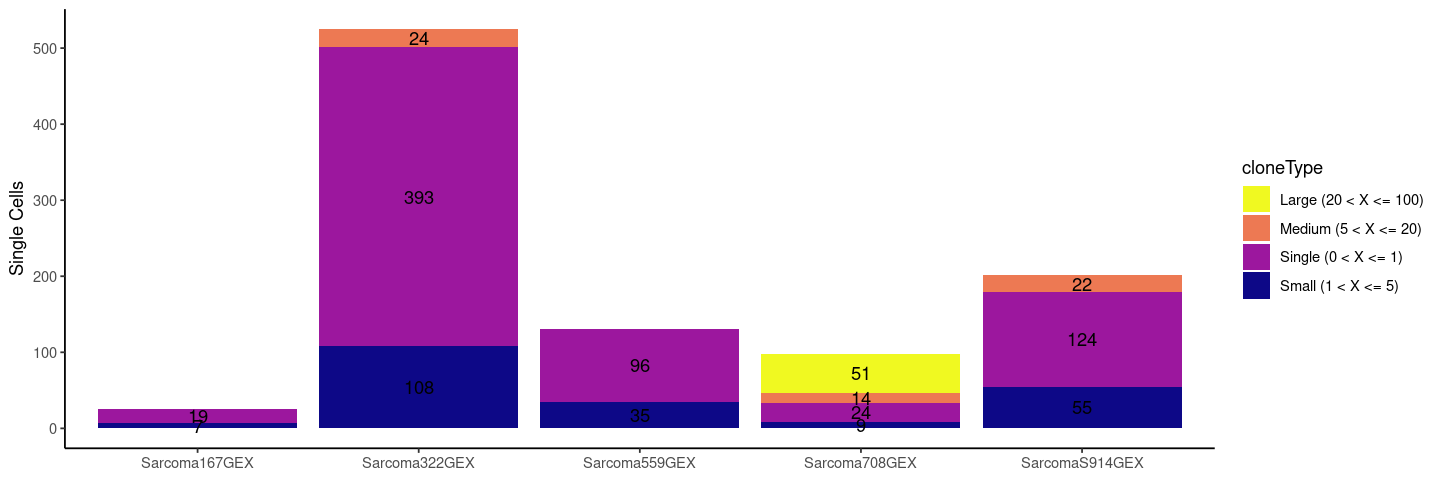

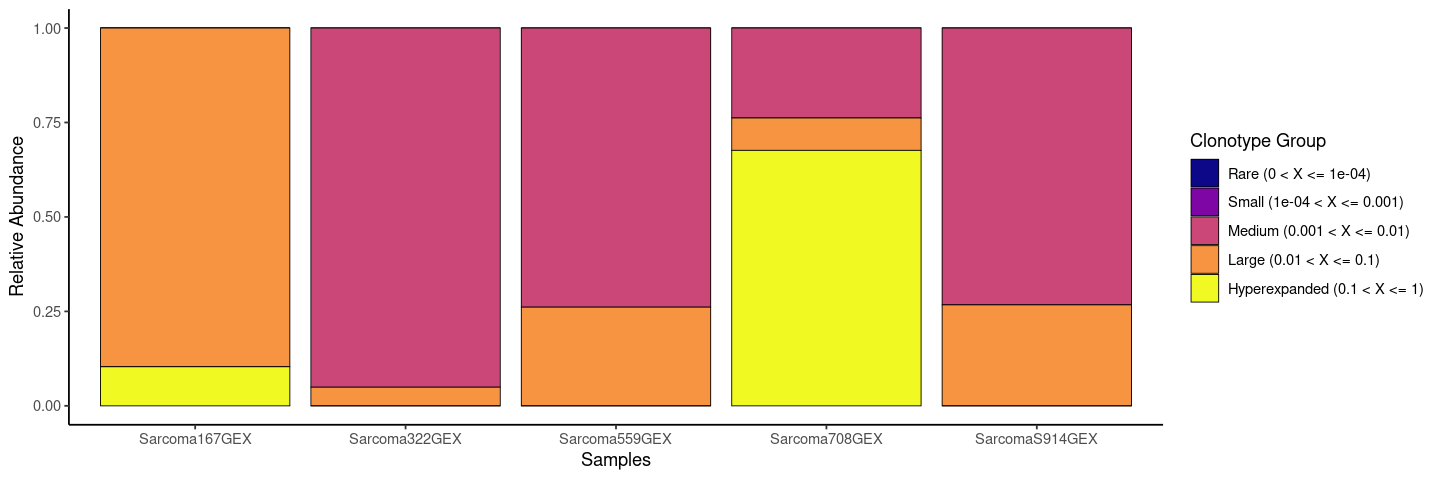

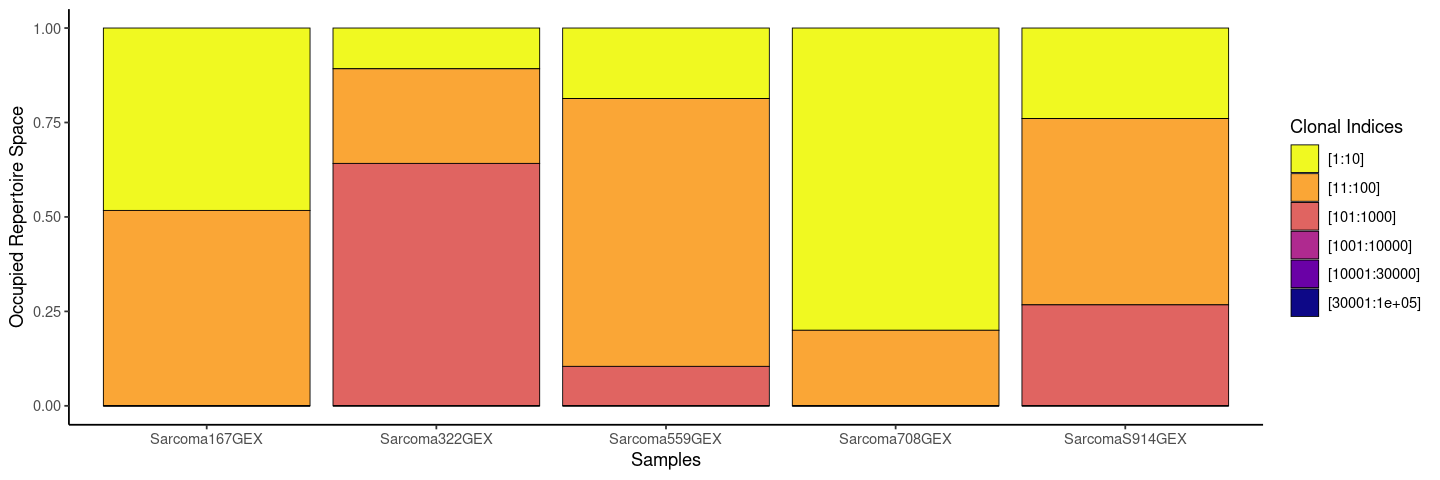

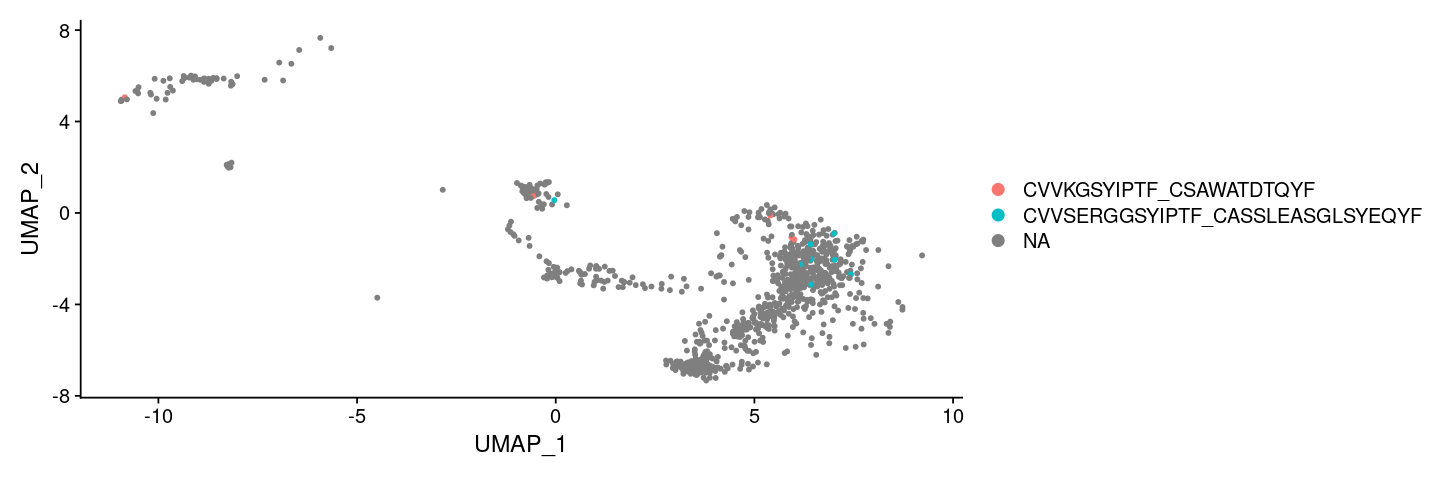

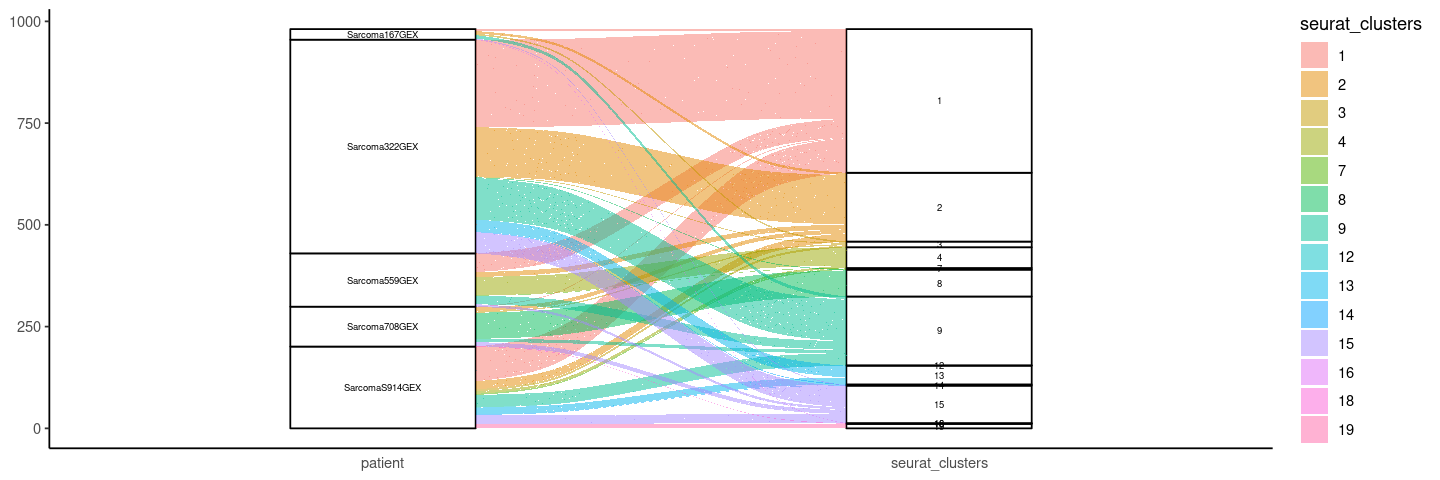

In [45]:
Tcell <- subset(seu_merged, subset = ((cell_type == 'T-cell')))
seu_tcr <- combineExpression(combined, Tcell, 
            cloneCall="gene+nt", proportion = FALSE, 
            cloneTypes=c(Single=1, Small=5, Medium=20, Large=100, Hyperexpanded=500))
length(Cells(seu_tcr))
sce <- as.SingleCellExperiment(seu_tcr)
#this has the cell classification
table(sce$ident)
seu_matched_tcr <- subset(seu_tcr, subset = Frequency > 0)
length(Cells(seu_matched_tcr))
occupiedscRepertoire(seu_matched_tcr, x.axis = "patient")
clonalHomeostasis(combined, cloneCall = "nt")
clonalProportion(combined, cloneCall = "nt")
seu_matched_tcr <- highlightClonotypes(seu_matched_tcr, 
              cloneCall= "aa", 
              sequence = c("CVVKGSYIPTF_CSAWATDTQYF", "CVVSERGGSYIPTF_CASSLEASGLSYEQYF"))
DimPlot(seu_matched_tcr, group.by = "highlight") + 
  theme(plot.title = element_blank())
alluvialClonotypes(seu_matched_tcr, cloneCall = "gene", 
                   y.axes = c("patient", "seurat_clusters"), 
                   color = "seurat_clusters") 

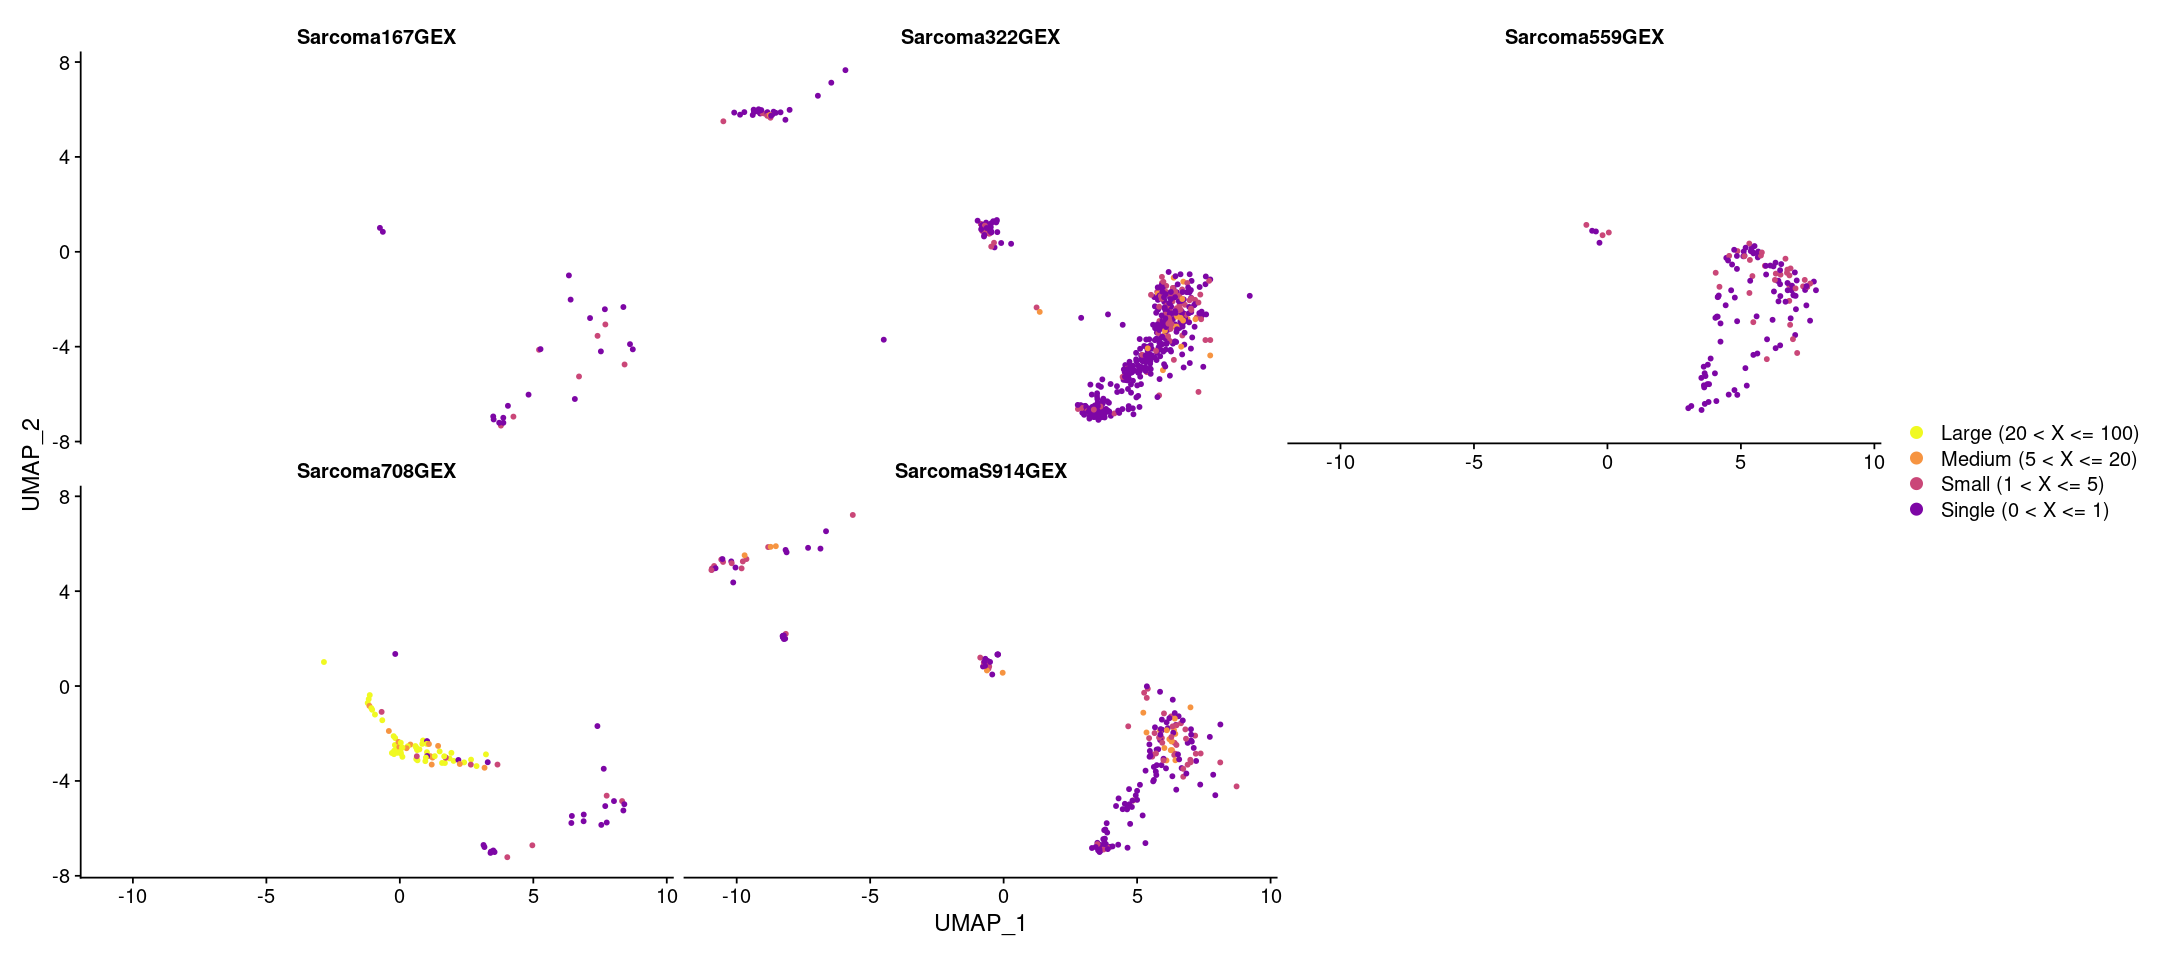

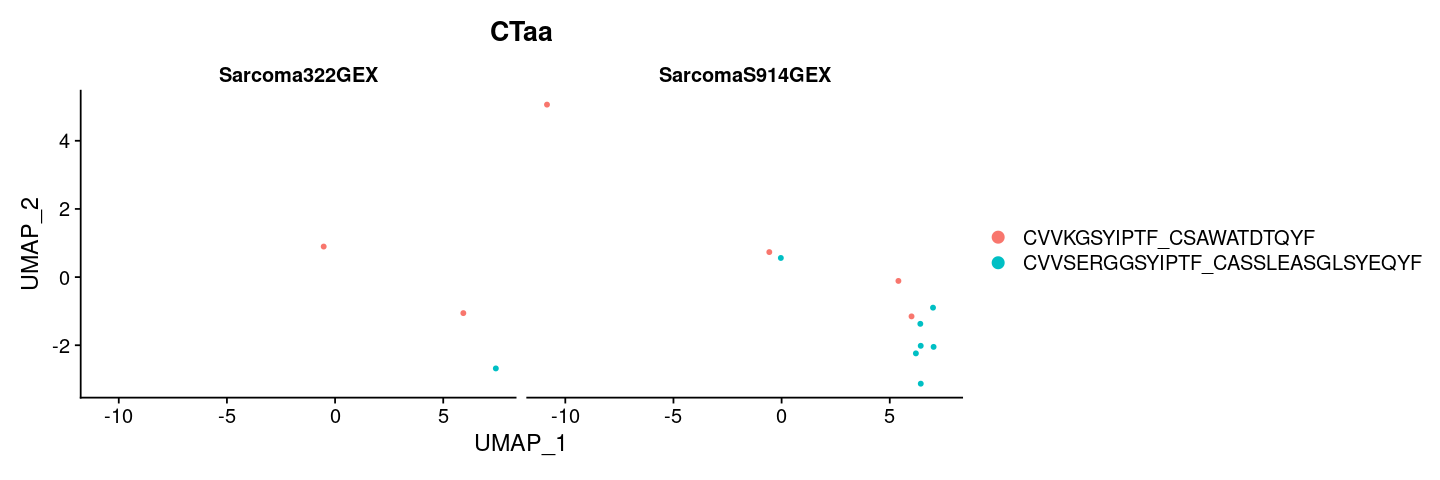

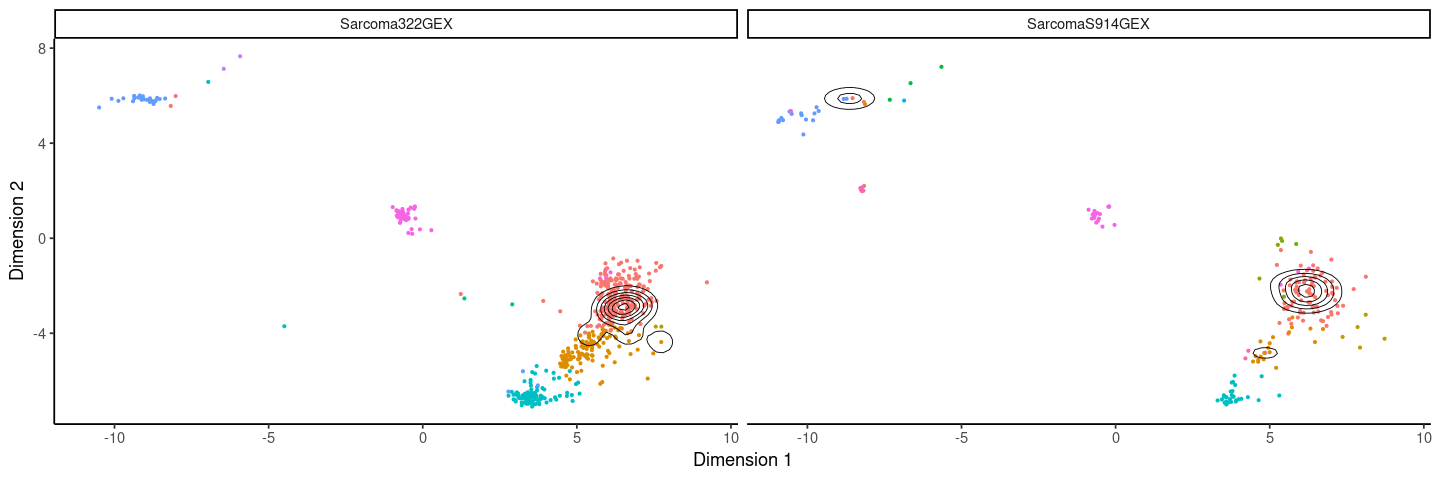

In [46]:
colorblind_vector <- colorRampPalette(rev(c("#0D0887FF", "#47039FFF", 
              "#7301A8FF", "#9C179EFF", "#BD3786FF", "#D8576BFF",
              "#ED7953FF","#FA9E3BFF", "#FDC926FF", "#F0F921FF")))

# colorblind_vector <- colorRampPalette(rev(c("#FFFFCC","#C7E9B4","#7FCDBB","#40B6C4","#2C7FB8" ,"#253494")))
slot(seu_matched_tcr, "meta.data")$cloneType <- factor(slot(seu_matched_tcr, "meta.data")$cloneType, 
                levels = c("Hyperexpanded (100 < X <= 500)", 
                           "Large (20 < X <= 100)", 
                            "Medium (5 < X <= 20)", 
                            "Small (1 < X <= 5)", 
                            "Single (0 < X <= 1)", NA))
interest <- subset(seu_matched_tcr, subset = (patient == 'Sarcoma322GEX') | (patient == 'SarcomaS914GEX'))
options(repr.plot.width=18, repr.plot.height=8)
DimPlot(seu_matched_tcr, group.by = "cloneType", split.by="patient", ncol=3) +
    scale_color_manual(values = colorblind_vector(5), na.value="grey") + 
  theme(plot.title = element_blank())

options(repr.plot.width=12, repr.plot.height=4)
seu_clonotype_match <- subset(seu_tcr, subset = (CTaa == "CVVKGSYIPTF_CSAWATDTQYF") | (CTaa == "CVVSERGGSYIPTF_CASSLEASGLSYEQYF"))
DimPlot(seu_clonotype_match, group.by = "CTaa", split.by="patient", ncol=2)

clonalOverlay(interest, reduction = "umap", 
              freq.cutpoint = 10, bins = 8, facet = "patient") + 

guides(color = "none")

In [28]:
write.csv(seu_matched_tcr@meta.data, "../CompiledData/data/sarcoma_all/updated_matched_tcr_metadata.csv")

In [39]:
seu_matched_tcr <- read.csv("../CompiledData/data/sarcoma_all/updated_matched_tcr_metadata.csv")

In [40]:
sum(seu_matched_tcr$Frequency)

[1] 3159

In [41]:
seu_matched_tcr

X,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,patient,celltype_initial_singleR,⋯,tumor,cell_type,barcode,CTgene,CTnt,CTaa,CTstrict,Frequency,cloneType,highlight
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
Sarcoma167GEX_ACTGAGTCAGACGCCT-1,Sarcoma167GEX,3814,1980,1.7304667,0.4195071,0.28841112,0.7079182,Sarcoma167GEX,CD4+ T-cells,⋯,T-cell,T-cell,Sarcoma167GEX_ACTGAGTCAGACGCCT-1,TRAV12-2.TRAJ5.TRAC_TRBV18.NA.TRBJ2-7.TRBC2,TGTGCCGCGCCTAAGTCGGGCAGGAGAGCACTTACTTTT_TGTGCCAGCTCACCATTCCGGGACAGCTCCTACGAGCAGTACTTC,CAAPKSGRRALTF_CASSPFRDSSYEQYF,TRAV12-2.TRAJ5.TRAC_TGTGCCGCGCCTAAGTCGGGCAGGAGAGCACTTACTTTT_TRBV18.NA.TRBJ2-7.TRBC2_TGTGCCAGCTCACCATTCCGGGACAGCTCCTACGAGCAGTACTTC,1,Single (0 < X <= 1),NA
Sarcoma167GEX_CTAAGACCATTAACCG-1,Sarcoma167GEX,3188,1770,2.9171895,0.2823087,0.00000000,0.2823087,Sarcoma167GEX,CD4+ T-cells,⋯,T-cell,T-cell,Sarcoma167GEX_CTAAGACCATTAACCG-1,NA_TRBV7-2.NA.TRBJ2-7.TRBC2,NA_TGTGCCAGCAGCTTAGTTAGTTTACGGGGCGACGAGCAGTACTTC,NA_CASSLVSLRGDEQYF,NA_NA_TRBV7-2.NA.TRBJ2-7.TRBC2_TGTGCCAGCAGCTTAGTTAGTTTACGGGGCGACGAGCAGTACTTC,2,Small (1 < X <= 5),NA
Sarcoma167GEX_TTCGAAGGTATAGGGC-1,Sarcoma167GEX,3199,1901,2.3132229,0.3125977,0.18755861,0.5001563,Sarcoma167GEX,CD8+ T-cells,⋯,NA,T-cell,Sarcoma167GEX_TTCGAAGGTATAGGGC-1,TRAV13-2.TRAJ34.TRAC_TRBV12-4.NA.TRBJ1-5.TRBC1,TGTGCAGAGATCCCCCCCACCGACAAGCTCATCTTT_TGTGCCAGCAGTTTAGCGGGGGGGCGAGGCGGTCAGCCCCAGCATTTT,CAEIPPTDKLIF_CASSLAGGRGGQPQHF,TRAV13-2.TRAJ34.TRAC_TGTGCAGAGATCCCCCCCACCGACAAGCTCATCTTT_TRBV12-4.NA.TRBJ1-5.TRBC1_TGTGCCAGCAGTTTAGCGGGGGGGCGAGGCGGTCAGCCCCAGCATTTT,1,Single (0 < X <= 1),NA
Sarcoma167GEX_CTGCGGATCGAGGTAG-1,Sarcoma167GEX,2153,1460,1.6720855,1.3469577,1.39340455,2.7403623,Sarcoma167GEX,CD8+ T-cells,⋯,T-cell,T-cell,Sarcoma167GEX_CTGCGGATCGAGGTAG-1,NA_TRBV13.NA.TRBJ1-2.TRBC1,NA_TGTGCCAGCAGCAGGCGTAGGGAATCTTCTGGCTACACCTTC,NA_CASSRRRESSGYTF,NA_NA_TRBV13.NA.TRBJ1-2.TRBC1_TGTGCCAGCAGCAGGCGTAGGGAATCTTCTGGCTACACCTTC,2,Small (1 < X <= 5),NA
Sarcoma167GEX_CACACCTAGAACTGTA-1,Sarcoma167GEX,2119,1387,2.4539877,0.6134969,0.61349693,1.2269939,Sarcoma167GEX,CD8+ T-cells,⋯,T-cell,T-cell,Sarcoma167GEX_CACACCTAGAACTGTA-1,TRAV12-2.TRAJ21.TRAC_TRBV18.NA.TRBJ1-1.TRBC1,TGTGCCGTGGACAACTTCAACAAATTTTACTTT_TGTGCCAGCTCACCCACCATGAACACTGAAGCTTTCTTT,CAVDNFNKFYF_CASSPTMNTEAFF,TRAV12-2.TRAJ21.TRAC_TGTGCCGTGGACAACTTCAACAAATTTTACTTT_TRBV18.NA.TRBJ1-1.TRBC1_TGTGCCAGCTCACCCACCATGAACACTGAAGCTTTCTTT,1,Single (0 < X <= 1),NA
Sarcoma167GEX_TATCTCATCAGTCAGT-1,Sarcoma167GEX,1742,1129,1.7795637,0.1722158,0.05740528,0.2296211,Sarcoma167GEX,CD4+ T-cells,⋯,T-cell,T-cell,Sarcoma167GEX_TATCTCATCAGTCAGT-1,NA_TRBV24-1.TRBD1.TRBJ2-1.TRBC2,NA_TGTGCCACCAGTGACACAGGGGGCCAGATAAGTAATGAGCAGTTCTTC,NA_CATSDTGGQISNEQFF,NA_NA_TRBV24-1.TRBD1.TRBJ2-1.TRBC2_TGTGCCACCAGTGACACAGGGGGCCAGATAAGTAATGAGCAGTTCTTC,1,Single (0 < X <= 1),NA
Sarcoma167GEX_CGGAGTCAGTGAAGAG-1,Sarcoma167GEX,1660,1166,1.1445783,0.3614458,0.48192771,0.8433735,Sarcoma167GEX,CD4+ T-cells,⋯,T-cell,T-cell,Sarcoma167GEX_CGGAGTCAGTGAAGAG-1,TRAV9-2.TRAJ8.TRAC_TRBV2.NA.TRBJ2-7.TRBC2,TGTGCTCTGAGTGATAACACAGGCTTTCAGAAACTTGTATTT_TGTGCCAGCAGTGAAGCGCAGGGTCCCTACGAGCAGTACTTC,CALSDNTGFQKLVF_CASSEAQGPYEQYF,TRAV9-2.TRAJ8.TRAC_TGTGCTCTGAGTGATAACACAGGCTTTCAGAAACTTGTATTT_TRBV2.NA.TRBJ2-7.TRBC2_TGTGCCAGCAGTGAAGCGCAGGGTCCCTACGAGCAGTACTTC,1,Single (0 < X <= 1),NA
Sarcoma167GEX_CAGTCCTTCAGTTAGC-1,Sarcoma167GEX,1696,1112,2.7712264,0.5896226,1.65094340,2.2405660,Sarcoma167GEX,CD8+ T-cells,⋯,NA,T-cell,Sarcoma167GEX_CAGTCCTTCAGTTAGC-1,TRAV17.TRAJ26.TRAC_TRBV20-1.NA.TRBJ1-1.TRBC1,TGTGCTACGGACGACTATGGTCAGAATTTTGTCTTT_TGCAGTGCCGGGTTGGGCACTGAAGCTTTCTTT,CATDDYGQNFVF_CSAGLGTEAFF,TRAV17.TRAJ26.TRAC_TGTGCTACGGACGACTATGGTCAGAATTTTGTCTTT_TRBV20-1.NA.TRBJ1-1.TRBC1_TGCAGTGCCGGGTTGGGCACTGAAGCTTTCTTT,1,Single (0 < X <= 1),NA
Sarcoma167GEX_GGCTGGTTCACCTTAT-1,Sarcoma167GEX,1581,1096,4.1113219,0.3162555,0.18975332,0.5060089,Sarcoma167GEX,CD4+ T-cells,⋯,T-cell,T-cell,Sarcoma167GEX_GGCTGGTTCACCTTAT-1,TRAV19

In [52]:
unique(seu_matched_tcr@meta.data["CTstrict"])

,CTstrict
,<chr>
Sarcoma167GEX_ACTGAGTCAGACGCCT-1,TRAV12-2.TRAJ5.TRAC_TGTGCCGCGCCTAAGTCGGGCAGGAGAGCACTTACTTTT_TRBV18.NA.TRBJ2-7.TRBC2_TGTGCCAGCTCACCATTCCGGGACAGCTCCTACGAGCAGTACTTC
Sarcoma167GEX_CTAAGACCATTAACCG-1,NA_NA_TRBV7-2.NA.TRBJ2-7.TRBC2_TGTGCCAGCAGCTTAGTTAGTTTACGGGGCGACGAGCAGTACTTC
Sarcoma167GEX_TTCGAAGGTATAGGGC-1,TRAV13-2.TRAJ34.TRAC_TGTGCAGAGATCCCCCCCACCGACAAGCTCATCTTT_TRBV12-4.NA.TRBJ1-5.TRBC1_TGTGCCAGCAGTTTAGCGGGGGGGCGAGGCGGTCAGCCCCAGCATTTT
Sarcoma167GEX_CTGCGGATCGAGGTAG-1,NA_NA_TRBV13.NA.TRBJ1-2.TRBC1_TGTGCCAGCAGCAGGCGTAGGGAATCTTCTGGCTACACCTTC
Sarcoma167GEX_CACACCTAGAACTGTA-1,TRAV12-2.TRAJ21.TRAC_TGTGCCGTGGACAACTTCAACAAATTTTACTTT_TRBV18.NA.TRBJ1-1.TRBC1_TGTGCCAGCTCACCCACCATGAACACTGAAGCTTTCTTT
Sarcoma167GEX_TATCTCATCAGTCAGT-1,NA_NA_TRBV24-1.TRBD1.TRBJ2-1.TRBC2_TGTGCCACCAGTGACACAGGGGGCCAGATAAGTAATGAGCAGTTCTTC
Sarcoma167GEX_CGGAGTCAGTGAAGAG-1,TRAV9-2.TRAJ8.TRAC_TGTGCTCTGAGTGATAACACAGGCTTTCAGAAACTTGTATTT_TRBV2.NA.TRBJ2-7.TRBC2_TGTGCCAGCAGTGAAGCGCAGGGTCCCTACGAGCAGTACTTC
Sarcoma167GEX_CAGTCCTTCAGTTAGC-1,TRAV17.TRAJ26.TRAC_TGTGCTACGGACGACTATGGTCAGAATTTTGTCTTT_TRBV20-1.NA.TRBJ1-1.TRBC1_TGCAGTGCCGGGTTGGGCACTGAAGCTTTCTTT
Sarcoma167GEX_GGCTGGTTCACCTTAT-1,TRAV19.TRAJ32.TRAC_TGTGCCCAGCCAAATGGTGCTACAAACAAGCTCATCTTT_TRBV20-1.NA.TRBJ1-1.TRBC1_TGCAGTGCTCGGACTGACACTGAAGCTTTCTTT


In [43]:
seu_matched_tcr@meta.data

ERROR: Error in eval(expr, envir, enclos): trying to get slot "meta.data" from an object (class "data.frame") that is not an S4 object 


In [44]:
filtered_df <- subset(seu_matched_tcr@meta.data, Frequency > 1)
filtered_df

ERROR: Error in subset(seu_matched_tcr@meta.data, Frequency > 1): trying to get slot "meta.data" from an object (class "data.frame") that is not an S4 object 


In [ ]:
colnames(seu_matched_tcr@meta.data)